
💬 쿠팡 UI 부정 키워드 TOP 30
불편하다: 47
짜증나다: 25
어렵다: 6
불편: 6
느리다: 5
답답하다: 5
버그: 4
복잡하다: 3
로딩: 2
짜증스럽다: 1
짜증: 1


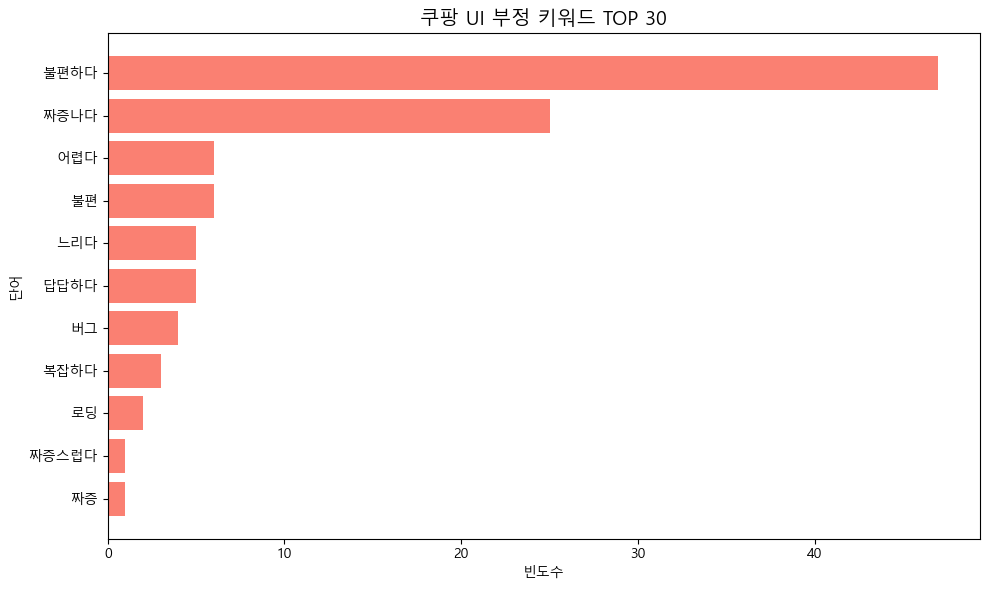

In [4]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 엑셀 데이터 불러오기
df = pd.read_excel(r'C:\Users\user\Desktop\마케팅\과제\팀프로젝트2\리뷰크롤링\coupang_reviews.xlsx')
comments = df['content'].dropna().astype(str)

# 2️⃣ 형태소 분석
okt = Okt()
tokens = []
for comment in comments:
    tokens.extend(okt.pos(comment, stem=True))  # 원형 복원

# 3️⃣ 불용어 정의
stopwords = [
    '좀', '진짜', '정말', '그냥', '너무', '거', '것', '이런', '저런',
    '에서', '하다', '있다', '없다', '되다', '입니다', '하게', '하면', '때문'
]

# 4️⃣ 부정 UI 관련 키워드 정의
negative_ui_words = [
    '불편', '복잡', '느리', '어렵', '답답', '헷갈리', '지저분', '버그', '로딩', '짜증', '튕기'
]

# 5️⃣ 필터링: 명사/형용사/동사 & 길이>1 & 불용어 제거
filtered_words = [
    word for word, pos in tokens
    if pos in ['Noun', 'Adjective', 'Verb'] 
    and len(word) > 1
    and word not in stopwords
]

# 6️⃣ 부정 UI 키워드 중심으로 필터링
negative_filtered = [w for w in filtered_words if any(k in w for k in negative_ui_words)]

# 7️⃣ 빈도 계산
word_count = Counter(negative_filtered)
top_30 = word_count.most_common(30)

print("\n💬 쿠팡 UI 부정 키워드 TOP 30")
for w, c in top_30:
    print(f"{w}: {c}")

# 8️⃣ 시각화
plt.figure(figsize=(10,6))
plt.barh(
    [w for w, _ in top_30[::-1]],
    [c for _, c in top_30[::-1]],
    color='salmon'
)
plt.title("쿠팡 UI 부정 키워드 TOP 30", fontsize=14)
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()



💬 쿠팡 앱 단점/불편 키워드 TOP 10
배송: 110
광고: 92
결제: 68
불편하다: 47
짜증나다: 25
환불: 23
취소: 20
오류: 14
검색: 8
어렵다: 6

💬 '불편' 관련 샘플 문장 10개

💬 '불편'과 함께 언급된 상위 단어

💬 '결제'과 함께 언급된 상위 단어
쿠팡: 22
와우: 21
고객: 14
멤버십: 10
취소: 10
센터: 10
해지: 9
상품: 9
사용: 8
주문: 8

💬 '배송'과 함께 언급된 상위 단어
쿠팡: 39
상품: 23
제품: 21
로켓: 18
주문: 17
물건: 17
고객: 15
판매: 13
와우: 11
취소: 11

💬 SWOT W용 문장 (상위 10개 키워드 기준)
- 배송 정보/추적 관련 문제로 사용자 불만 발생 (빈도: 110)
- 광고 관련 문제 발생 (빈도: 92)
- 결제 과정에서 오류/지연으로 구매 이탈 발생 (빈도: 68)
- 불편하다 관련 문제 발생 (빈도: 47)
- 짜증나다 관련 문제 발생 (빈도: 25)
- 환불 처리 속도가 느려 사용자 불만 증가 (빈도: 23)
- 주문 취소/환불 과정이 불편함 (빈도: 20)
- 앱 전반에서 오류 발생으로 사용성 저하 (빈도: 14)
- 검색 기능이 부정확하거나 느려 불편 (빈도: 8)
- 어렵다 관련 문제 발생 (빈도: 6)


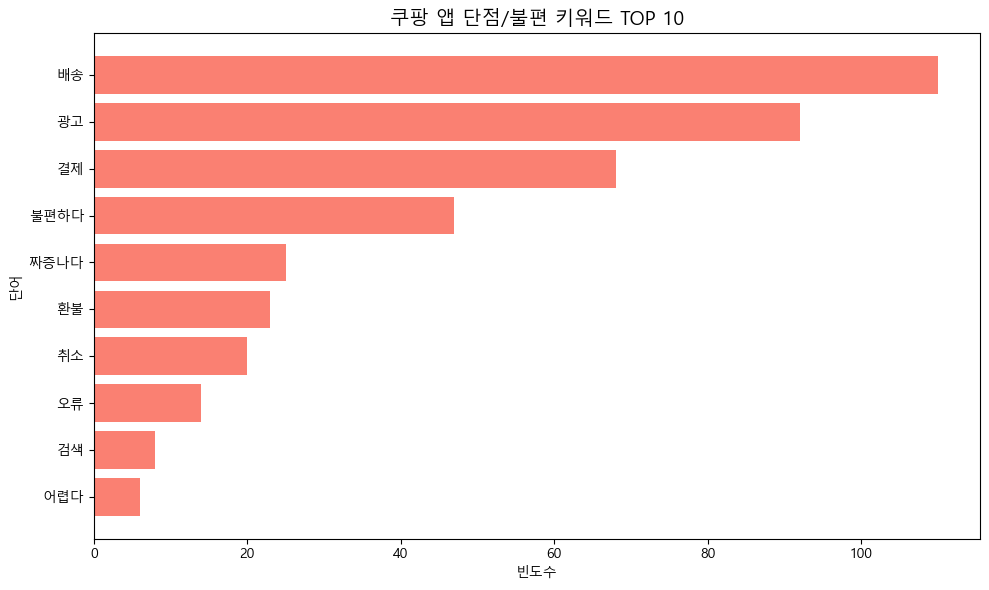

In [7]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 엑셀 데이터 불러오기
df = pd.read_excel(r'C:\Users\user\Desktop\마케팅\과제\팀프로젝트2\리뷰크롤링\coupang_reviews.xlsx')
comments = df['content'].dropna().astype(str)

# 2️⃣ 형태소 분석 준비
okt = Okt()

# 3️⃣ 불용어 정의
stopwords = [
    '좀', '진짜', '정말', '그냥', '너무', '거', '것', '이런', '저런',
    '에서', '하다', '있다', '없다', '되다', '입니다', '하게', '하면', '때문'
]

# 4️⃣ 앱 전반 부정 키워드 정의 (UI, 결제, 배송, 오류 등)
negative_words = [
    '불편', '복잡', '느리', '어렵', '답답', '헷갈리', '지저분', '버그', '로딩', 
    '짜증', '튕기', '결제', '배송', '취소', '환불', '검색', '오류', '지연', '광고'
]

# 5️⃣ 형태소 분석 & 필터링 (명사/형용사/동사, 길이>1, 불용어 제거)
tokens = []
for comment in comments:
    tokens.extend(okt.pos(comment, stem=True))

filtered_words = [
    word for word, pos in tokens
    if pos in ['Noun', 'Adjective', 'Verb'] 
    and len(word) > 1
    and word not in stopwords
]

# 6️⃣ 부정 키워드 중심 필터링
negative_filtered = [w for w in filtered_words if any(k in w for k in negative_words)]

# 7️⃣ 상위 10개 부정 키워드
word_count = Counter(negative_filtered)
top_10 = word_count.most_common(10)

print("\n💬 쿠팡 앱 단점/불편 키워드 TOP 10")
for w, c in top_10:
    print(f"{w}: {c}")

# 8️⃣ 각 키워드 관련 문장 추출
keyword_sentences = {}
for kw, _ in top_10:
    keyword_sentences[kw] = [comment for comment in comments if kw in comment]

print("\n💬 '불편' 관련 샘플 문장 10개")
for s in keyword_sentences.get('불편', [])[:10]:
    print("-", s)

# 9️⃣ 연관 단어 분석 (키워드와 함께 언급되는 기능/상황)
for kw in ['불편', '결제', '배송']:
    co_occurrence = defaultdict(int)
    for sentence in keyword_sentences.get(kw, []):
        words = [w for w in okt.nouns(sentence) if len(w) > 1 and w not in stopwords]
        for w in words:
            if w != kw:
                co_occurrence[w] += 1
    top_related = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\n💬 '{kw}'과 함께 언급된 상위 단어")
    for w, c in top_related:
        print(f"{w}: {c}")

# 10️⃣ SWOT W용 문장 예시 (자동 생성)
keyword_to_sentence = {
    '불편': '앱 탐색 및 기능 사용이 불편하여 신규 사용자가 적응하기 어려움',
    '복잡': '메뉴와 기능 구조가 복잡하여 사용자 경험 저하',
    '느리': '로딩 및 반응 속도가 느려 전환율 감소 가능',
    '어렵': '앱 기능 사용이 어려워 학습 부담 증가',
    '답답': '앱 반응 속도가 느려 사용자가 답답함을 느낌',
    '헷갈리': '화면 구성/버튼 배치가 헷갈려 혼란 발생',
    '지저분': '화면이 지저분하게 느껴져 시각적 불편',
    '버그': '결제 및 장바구니 등 기능에서 버그 발생',
    '로딩': '페이지 로딩 지연으로 사용자 경험 저하',
    '짜증': '앱 사용 중 잦은 오류로 사용자 불만 증가',
    '튕기': '앱이 자주 튕겨 재사용 불편',
    '결제': '결제 과정에서 오류/지연으로 구매 이탈 발생',
    '배송': '배송 정보/추적 관련 문제로 사용자 불만 발생',
    '취소': '주문 취소/환불 과정이 불편함',
    '환불': '환불 처리 속도가 느려 사용자 불만 증가',
    '검색': '검색 기능이 부정확하거나 느려 불편',
    '오류': '앱 전반에서 오류 발생으로 사용성 저하',
    '지연': '앱 로딩 및 기능 반응 지연으로 전환율 감소'
}

print("\n💬 SWOT W용 문장 (상위 10개 키워드 기준)")
for w, c in top_10:
    sentence = keyword_to_sentence.get(w, f"{w} 관련 문제 발생")
    print(f"- {sentence} (빈도: {c})")

# 11️⃣ 시각화
plt.figure(figsize=(10,6))
plt.barh(
    [w for w, _ in top_10[::-1]],
    [c for _, c in top_10[::-1]],
    color='salmon'
)
plt.title("쿠팡 앱 단점/불편 키워드 TOP 10", fontsize=14)
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

# 1️⃣ 엑셀 데이터 불러오기
excel_path = r"C:\Users\user\Desktop\마케팅\과제\팀프로젝트2\리뷰크롤링\coupang_reviews.xlsx"
df = pd.read_excel(excel_path)

print(f"데이터 로드 완료 ✅ (총 {len(df)}개 리뷰)")

# 2️⃣ MySQL 연결 설정
user = "root"
password = "753951DnDn!!"
host = "localhost"
port = 3306
database = "ecommerce_v2"

# 3️⃣ SQLAlchemy 엔진 생성 (pymysql 기반)
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=utf8mb4")

# 4️⃣ 테이블 생성 및 데이터 업로드
table_name = "coupang_reviews"

# if_exists 옵션:
# 'replace' = 기존 테이블 덮어쓰기, 'append' = 이어붙이기
df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

print(f"MySQL 테이블 저장 완료 ✅ → {database}.{table_name}")


데이터 로드 완료 ✅ (총 500개 리뷰)
MySQL 테이블 저장 완료 ✅ → ecommerce_v2.coupang_reviews


In [14]:
# ==============================================
# 1️⃣ 라이브러리 불러오기
# ==============================================
import pandas as pd
from sqlalchemy import create_engine, text

# ==============================================
# 2️⃣ DB 연결 (SQLAlchemy 엔진 사용)
# ==============================================
user = "root"
password = "753951DnDn!!"
host = "localhost"
port = 3306
db_name = "ecommerce_v2"

# MySQL 연결 문자열
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}?charset=utf8mb4")

# ==============================================
# 3️⃣ SQL 전처리 (결측·중복·이상치·짧은 문장 제거)
# ==============================================
with engine.begin() as conn:
    # 3-1. 결측치 제거
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE content IS NULL OR TRIM(content) = '';
    """))

    # 3-2. 중복 제거 (content 기준, reviewId 최소값 유지)
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE reviewId NOT IN (
            SELECT * FROM (
                SELECT MIN(reviewId)
                FROM coupang_reviews
                GROUP BY content
            ) AS temp
        );
    """))

    # 3-3. score 이상치 제거 (1~5점 기준)
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE score < 1 OR score > 5;
    """))

    # 3-4. 너무 짧은 리뷰 제거 (5자 미만)
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE CHAR_LENGTH(content) < 5;
    """))

print("✅ SQL 전처리 완료 (결측·중복·이상치·짧은 문장 제거)")

# ==============================================
# 4️⃣ SQL 결과 확인
# ==============================================
# 리뷰 개수
result = pd.read_sql(text("SELECT COUNT(*) AS 리뷰수 FROM coupang_reviews;"), engine)
print(result)

# 샘플 리뷰 5개
sample = pd.read_sql(text("SELECT content FROM coupang_reviews LIMIT 5;"), engine)
print("\n📄 전처리 후 샘플 리뷰 5개:")
print(sample)

# ==============================================
# 5️⃣ 정제된 데이터 다시 불러오기 (형태소 분석용)
# ==============================================
df_clean = pd.read_sql(text("SELECT content FROM coupang_reviews;"), engine)
print(f"\n✅ 정제된 리뷰 개수: {len(df_clean)}")

# ==============================================
# 6️⃣ DB 연결 종료
# ==============================================
engine.dispose()


✅ SQL 전처리 완료 (결측·중복·이상치·짧은 문장 제거)
   리뷰수
0  476

📄 전처리 후 샘플 리뷰 5개:
                                             content
0                                  악덕기업은 이용하기 싫어서 삭제
1  쿠팡은 숫자를 셀줄 모르나? 간편로그인 알림 7일간 안보겠다고 체크하고 끄고 다음 ...
2                  결제가 안됨 다 맞는데 뭐가 틀리다는 거야? 코딩 발로 했냐
3  첨 제품을 이너스프리 립밤 결제하고 주소를안찍어 아직입니다 오늘주소등록했는데 배송해...
4  와우 가입이 거의 강요 수준이네.. 무슨 테무 같은 저질 중국앱 따라 하나... 참 나.

✅ 정제된 리뷰 개수: 476


✅ SQL 전처리 완료

✅ 정제된 리뷰 개수: 476

💬 쿠팡 UI/서비스 부정 키워드 TOP 10
배송: 110
광고: 92
결제: 68
불편하다: 47
짜증나다: 25
환불: 23
취소: 20
오류: 14
검색: 8
어렵다: 6


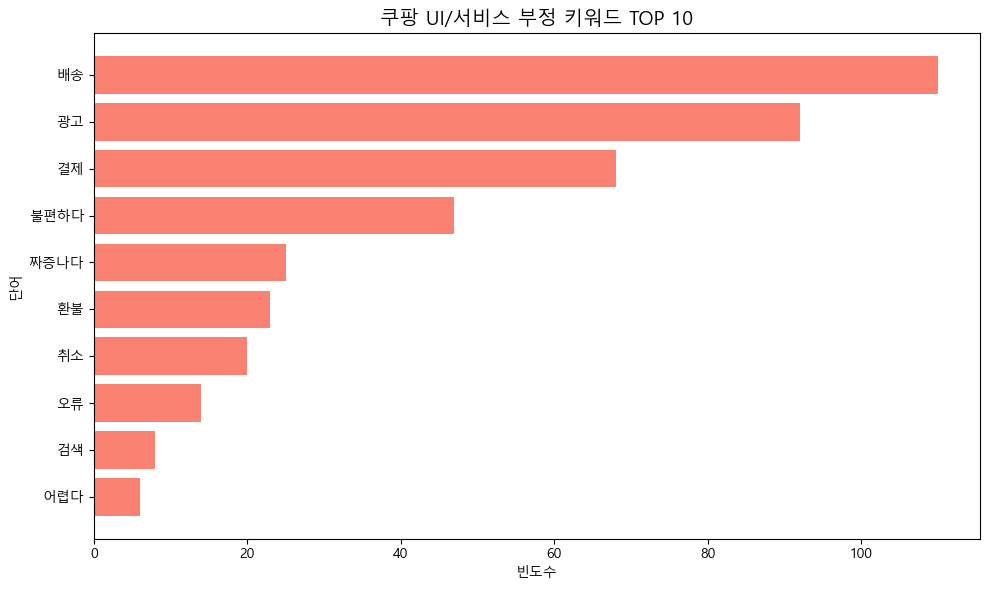

In [15]:
# ==============================================
# 1️⃣ 라이브러리 불러오기
# ==============================================
import pandas as pd
from sqlalchemy import create_engine, text
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ==============================================
# 2️⃣ DB 연결 (SQLAlchemy 엔진 사용)
# ==============================================
user = "root"
password = "753951DnDn!!"
host = "localhost"
port = 3306
db_name = "ecommerce_v2"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}?charset=utf8mb4")

# ==============================================
# 3️⃣ SQL 전처리 (결측·중복·이상치·짧은 문장 제거)
# ==============================================
with engine.begin() as conn:
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE content IS NULL OR TRIM(content) = '';
    """))
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE reviewId NOT IN (
            SELECT * FROM (
                SELECT MIN(reviewId)
                FROM coupang_reviews
                GROUP BY content
            ) AS temp
        );
    """))
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE score < 1 OR score > 5;
    """))
    conn.execute(text("""
        DELETE FROM coupang_reviews
        WHERE CHAR_LENGTH(content) < 5;
    """))

print("✅ SQL 전처리 완료")

# ==============================================
# 4️⃣ 정제된 데이터 불러오기
# ==============================================
df_clean = pd.read_sql(text("SELECT content FROM coupang_reviews;"), engine)
print(f"\n✅ 정제된 리뷰 개수: {len(df_clean)}")

# ==============================================
# 5️⃣ 형태소 분석
# ==============================================
okt = Okt()
tokens = []
for comment in df_clean['content'].astype(str):
    tokens.extend(okt.pos(comment, stem=True))  # 원형 복원

# ==============================================
# 6️⃣ 불용어 & 부정 UI 키워드 정의
# ==============================================
stopwords = [
    '좀', '진짜', '정말', '그냥', '너무', '거', '것', '이런', '저런',
    '에서', '하다', '있다', '없다', '되다', '입니다', '하게', '하면', '때문'
]

negative_words = [
    '불편', '복잡', '느리', '어렵', '답답', '헷갈리', '지저분', '버그', '로딩', 
    '짜증', '튕기', '결제', '배송', '취소', '환불', '검색', '오류', '지연', '광고'
]

# 명사/형용사/동사 & 길이>1 & 불용어 제거
filtered_words = [
    word for word, pos in tokens
    if pos in ['Noun', 'Adjective', 'Verb'] 
    and len(word) > 1
    and word not in stopwords
]

# 부정 키워드 중심 필터링
negative_filtered = [w for w in filtered_words if any(k in w for k in negative_words)]

# ==============================================
# 7️⃣ 키워드 빈도 계산 (Top 10)
# ==============================================
word_count = Counter(negative_filtered)
top_10 = word_count.most_common(10)

print("\n💬 쿠팡 UI/서비스 부정 키워드 TOP 10")
for w, c in top_10:
    print(f"{w}: {c}")

# ==============================================
# 8️⃣ 시각화
# ==============================================
plt.figure(figsize=(10,6))
plt.barh(
    [w for w, _ in top_10[::-1]],
    [c for _, c in top_10[::-1]],
    color='salmon'
)
plt.title("쿠팡 UI/서비스 부정 키워드 TOP 10", fontsize=14)
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()

# ==============================================
# 9️⃣ DB 연결 종료
# ==============================================
engine.dispose()
